By Darren Gidado, Date: 5/12/20

# Project - Explore Weather Trends

## 1. Extract the data
### Write a SQL query to extract city level and global data

I am using the **SQL Workspace** provided by Udacity to extract data from the temperatures database. I will be extracting data for London and the Global average temperatures from years 1750 to 2013. I used 'Instant SQL Formatter' to present the SQL code and format it in HTML to add colour. I also used SQL(HTML:SPAN) to keep the code in DIV tags preventing styling changes to the reset of the project.

There are three tables in the database:

   * city_list - This contains a list of cities and countries in the database. Look through them in order to find the city nearest to you.
   
   * city_data - This contains the average temperatures for each city by year (ºC).
   
   * global_data - This contains the average global temperatures by year (ºC).
   
<div><span style="font-family: Courier New; font-size: 10pt;">
<span style="color: blue; ">SELECT</span>&nbsp;<span style="color: maroon; ">city_data</span><span style="color: silver; ">.</span><span style="color: maroon; ">year</span><span style="color: silver; ">,</span>
<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color: maroon; ">city_data</span><span style="color: silver; ">.</span><span style="color: maroon; ">city</span><span style="color: silver; ">,</span>
<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color: maroon; ">city_data</span><span style="color: silver; ">.</span><span style="color: maroon; ">country</span><span style="color: silver; ">,</span>
<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color: maroon; ">city_data</span><span style="color: silver; ">.</span><span style="color: maroon; ">avg_temp</span>&nbsp;&nbsp;&nbsp;<span style="color: blue; ">AS</span>&nbsp;<span style="color: maroon; ">city_avg_temp</span><span style="color: silver; ">,</span>
<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color: maroon; ">global_data</span><span style="color: silver; ">.</span><span style="color: maroon; ">year</span><span style="color: silver; ">,</span>
<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color: maroon; ">global_data</span><span style="color: silver; ">.</span><span style="color: maroon; ">avg_temp</span>&nbsp;<span style="color: blue; ">AS</span>&nbsp;<span style="color: maroon; ">global_avg_temp</span>
<br/><span style="color: blue; ">FROM</span>&nbsp;&nbsp;&nbsp;<span style="color: maroon; ">city_data</span>
<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color: blue; ">JOIN</span>&nbsp;<span style="color: maroon; ">global_data</span>
<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color: blue; ">ON</span>&nbsp;<span style="color: maroon; ">city_data</span><span style="color: silver; ">.</span><span style="color: maroon; ">year</span>&nbsp;<span style="color: silver; ">=</span>&nbsp;<span style="color: maroon; ">global_data</span><span style="color: silver; ">.</span><span style="color: maroon; ">year</span>
<br/><span style="color: blue; ">WHERE</span>&nbsp;&nbsp;<span style="color: maroon; ">city_data</span><span style="color: silver; ">.</span><span style="color: maroon; ">city</span>&nbsp;<span style="color: blue; ">LIKE</span>&nbsp;<span style="color: maroon; ">(</span>&nbsp;<span style="color: red; ">'London'</span>&nbsp;<span style="color: maroon; ">)</span>
<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color: blue; ">AND</span>&nbsp;<span style="color: maroon; ">city_data</span><span style="color: silver; ">.</span><span style="color: maroon; ">country</span>&nbsp;<span style="color: blue; ">LIKE</span>&nbsp;<span style="color: maroon; ">(</span>&nbsp;<span style="color: red; ">'United&nbsp;Kingdom'</span>&nbsp;<span style="color: maroon; ">)</span>&nbsp;
</span></div>

## 2. Open up the CSV
I opened initially up the CSV spreadsheet in **Microsoft Excel** and cleaned up the data a bit by deleting the duplicate columns  'city' and 'year'. I could also do that in pandas in Python but I decided to use Excel. Next, I opened the CSV in **Python** to clean up the data some more.

In [1]:
# Importing NumPy library into the notebook
import numpy as np 

# Importing pandas library into the notebook
import pandas as pd 

# Importing matplot and pyplot libraries needed for creating the line chart
from matplotlib import pyplot as plt 

In [2]:
# Importing the extracted dataset and defining it as df (short for dataframe)
df = pd.read_csv( "london_results.csv" )

In [3]:
# Previewing the first 5 rows of the dataset
df.head()

,year,city,country,city_avg_temp,global_avg_temp
0,1750,London,United Kingdom,10.25,8.72
1,1751,London,United Kingdom,9.99,7.98
2,1752,London,United Kingdom,6.54,5.78
3,1753,London,United Kingdom,9.42,8.39
4,1754,London,United Kingdom,9.20,8.47


In [4]:
# Previewing the last 5 rows of the dataset 
df.tail()

,year,city,country,city_avg_temp,global_avg_temp
259,2009,London,United Kingdom,10.52,9.51
260,2010,London,United Kingdom,9.38,9.70
261,2011,London,United Kingdom,11.19,9.52
262,2012,London,United Kingdom,10.00,9.51
263,2013,London,United Kingdom,9.91,9.61


Now we need to define a function for the calculation of Moving Averages in order to get a smooth graph.

In [5]:
# Renaming 'avg_temp' to 'london_avg_temp'
df.rename({'city_avg_temp':'london_avg_temp'},axis=1,inplace=True)

# Delete the unneccesary rows
df.drop(['city','country'],axis=1, inplace=True)

# See the result
df.head(5)

,year,london_avg_temp,global_avg_temp
0,1750,10.25,8.72
1,1751,9.99,7.98
2,1752,6.54,5.78
3,1753,9.42,8.39
4,1754,9.20,8.47


In [6]:
# Checking the information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 3 columns):
year               264 non-null int64
london_avg_temp    264 non-null float64
global_avg_temp    264 non-null float64
dtypes: float64(2), int64(1)
memory usage: 6.3 KB


## 3. Create a line chart
I am going to be using **Python** and the pandas.DataFrame.rolling function to calculate the moving average to smooth out the large fluctuations in the original graph and make trends more observable.

In [7]:
# Function that calculates Moving Average - mean: calculates mean of the values, dropna: gets rid of missing datapoints
def moving_avg (mA_range, df_input):
    output = df_input.rolling(window = 10, on = "year" ).mean().dropna()
    return output

In [8]:
# Defining the range of the Moving Average in years
mA_value = 10

# Renaming the function of the Moving Average
chart_moving_avg = moving_avg(mA_value, df)

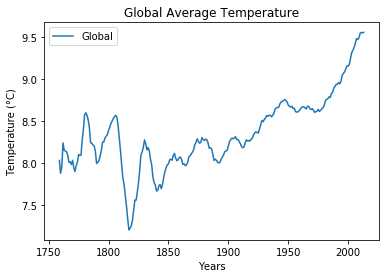

In [9]:
# Drawing the graph for Global Temperature
plt.plot(chart_moving_avg [ 'year' ], chart_moving_avg [ 'global_avg_temp' ], label = 'Global' )
plt.legend()
plt.xlabel ( "Years" )
plt.ylabel ( "Temperature (°C)" )
plt.title ( "Global Average Temperature" )
plt.show ()

Above is a graph of the output. I have analysed the Global data separately in order to check and distinguish it from the combined data of London and the Global Average Temperatures. Next, I will combine the data with the City data for London.

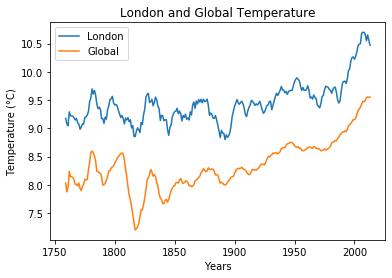

In [10]:
# Adding London to the graph for Global Temperature
plt.plot(chart_moving_avg ['year'], chart_moving_avg ['london_avg_temp'], label = 'London')

# Drawing the graph for Global Temperature
plt.plot(chart_moving_avg ['year'], chart_moving_avg ['global_avg_temp'], label = 'Global')
plt.legend()
plt.xlabel ( "Years" )
plt.ylabel ( "Temperature (°C)" )
plt.title ( "London and Global Temperature" )
plt.show ()

I can change the Moving Average from 10 years to 50 years to smooth out the chart even more to clearly observe the trendlines. Below is the resulting graph. 

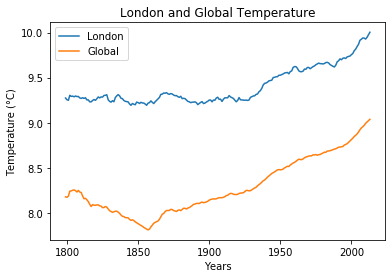

In [11]:
# Changing the Moving Average from 10 years to 50 years to smooth out the lines more

def moving_avg_50 (mA_range, df_input):
    output = df_input.rolling(window = 50, on = "year" ).mean().dropna()
    return output

mA_value = 50

# Renaming the function of the Moving Average again
chart_moving_avg_50 = moving_avg_50(mA_value, df)

plt.plot(chart_moving_avg_50 ['year'], chart_moving_avg_50 ['london_avg_temp'], label = 'London')
plt.plot(chart_moving_avg_50 ['year'], chart_moving_avg_50 ['global_avg_temp'], label = 'Global')
plt.legend()
plt.xlabel ( "Years" )
plt.ylabel ( "Temperature (°C)" )
plt.title ( "London and Global Temperature" )
plt.show ()

## 4. Make Observations 
**I have analysed my results further by asking these questions:**
1. Is your city hotter or cooler on average compared to the global average? Has the difference been consistent over time?
2. How do the changes in your city’s temperatures over time compare to the changes in the global average?
3. What does the overall trend look like? Is the world getting hotter or cooler? Has the trend been consistent over the last few hundred years?
4. How much is the temperature rising per year, globally and in the city?

In [12]:
# Copying the DataFrame to avoid modifying the original data
df_new = df.copy()

# Previewing the result
print('Copied DataFrame:')
df_new.head()

Copied DataFrame:


,year,london_avg_temp,global_avg_temp
0,1750,10.25,8.72
1,1751,9.99,7.98
2,1752,6.54,5.78
3,1753,9.42,8.39
4,1754,9.20,8.47


In [13]:
# Setting column 'year' as index
df_new.index=df['year']

# Deleting the unneccesary rows
df_new.drop(['year'],axis=1, inplace=True)

In [14]:
# Exploring the dip in the graph around the year 1800 using loc (location)
df_new.loc[1810:1820]

,london_avg_temp,global_avg_temp
year,,
1810,8.97,6.92
1811,10.10,6.86
1812,8.58,7.05
1813,9.13,7.74
1814,7.93,7.59
1815,8.99,7.24
1816,7.98,6.94
1817,8.95,6.98
1818,9.88,7.83


In [15]:
# Getting temperatures for the year 1750
df_new.loc[1750]

london_avg_temp    10.25
global_avg_temp     8.72
Name: 1750, dtype: float64

In [16]:
# Getting temperatures for the year 2013
df_new.loc[2013]

london_avg_temp    9.91
global_avg_temp    9.61
Name: 2013, dtype: float64

In [17]:
# Calculating the average difference between London and the Global average temperature
gat = df_new["global_avg_temp"].mean() 
lat = df_new["london_avg_temp"].mean()

# Rounding the answer to 2 decimal places
print(round(lat - gat, 2))

1.1


London is on average 1.1 degrees hotter than the global temperature.

In [18]:
# Creating a DataFrame showing just the early years 1800-1825 (25yrs)
df_18001825 = df_new.loc[1800:1825]
df_18001825

,london_avg_temp,global_avg_temp
year,,
1800,9.32,8.48
1801,9.68,8.59
1802,9.31,8.58
1803,8.79,8.50
1804,9.37,8.84
1805,8.56,8.56
1806,9.87,8.43
1807,9.03,8.28
1808,8.91,7.63


In [19]:
# Column mean of the dataframe from the early years 1800-1825 (25yrs)
df_18001825.mean(axis=0)

london_avg_temp    9.190385
global_avg_temp    7.848077
dtype: float64

In [20]:
# Creating a DataFrame showing just late years 1988-2013 (25yrs)
df_19882013 = df_new.loc[1988:2013]
df_19882013

,london_avg_temp,global_avg_temp
year,,
1988,9.82,9.20
1989,10.76,8.92
1990,10.94,9.23
1991,9.67,9.18
1992,10.15,8.84
1993,9.69,8.87
1994,10.48,9.04
1995,10.55,9.35
1996,9.27,9.04


In [21]:
# Column mean of the dataframe from the early years 1988-2013 (25yrs)
df_19882013.mean(axis=0)

london_avg_temp    10.398462
global_avg_temp     9.344231
dtype: float64

In [22]:
# Defining degrees Celcius sign
degree_sign = u"\N{DEGREE SIGN}C"
print(degree_sign)

°C


In [23]:
# lat = London Averge Temperature, gat = Global Average Temperature, early = 1800-1825, late = 1988-2013
early_lat = 9.190385
late_lat = 10.398462
early_gat = 7.848077
late_gat = 9.344231

# Global Average Temperature Difference (number is for decimal places)
print("LAT overall difference: +", round(late_gat - early_gat, 2), (degree_sign))
      
# London Average Temperature Difference (number is for decimal places)
print("GAT overall difference: +", round(late_lat - early_lat, 1), (degree_sign))

LAT overall difference: + 1.5 °C
GAT overall difference: + 1.2 °C


In [24]:
# Calculate global average temperature rise per year

# Finding the total number of years
year_range = 2013-1800

# Dividing the global average temperature difference by the total number of years, .3 decimal places to add detail
print("Global Average Temperature rise per year: +", round((late_gat - early_gat) / (year_range), 3),(degree_sign))
print("London Average Temperature rise per year: +", round((late_lat - early_lat) / (year_range), 3),(degree_sign))

Global Average Temperature rise per year: + 0.007 °C
London Average Temperature rise per year: + 0.006 °C


**Answers:**
1. London is around 1 °C hotter on average compared to the global average. The difference has been consistent over time for the most part being an upward trend for both. My observations are based on the 10 year Moving Average chart since it shows more detail.

2.  The changes in London's average temperatures over time almost mirror the global average temperature. The only exception is around the year 1800-1850 where the temperatures dipped by around 0.5 °C for London but 1.7 °C for the Globe. The difference between London and the Global average temperature was as much as 1.7 °C.

3. The overall trend is clearly upwards and the world is getting hotter based on the line chart. The trend is fairly consistent over the past few hundred years apart from the 1800's where the temperature shows a downward trend for a few decades before rising again between the year 1825 and 1850.

4. Based on the temperature averages of the first and the last 25 years of the data from 1800 to 2013 the London average temperature has risen by 1.5 °C and the Global average temperature has risen by 1.21 °C. We can also calculate the yearly temperature rise over the years using this data. For London the temperature is rising at an average of 0.006 per year, for the globe it is 0.007 °C per year.

## 5. More questions
1. What's the correlation coefficient?
2. Can you estimate the average temperature in your city based on the average global temperature?
3. Multiple cities - Add your favorite cities from around the globe to your visualization. What do you learn about them?

### The Correlation Coefficient

In [25]:
# Using scipy to calculate the Pearson Correlation Coefficient between the London and global temperatures
import scipy
from scipy.stats.stats import pearsonr

london_data = df['london_avg_temp']
global_data = df['global_avg_temp']
year_data = df['year']

pearsonr_coefficient, p_value = pearsonr(london_data, global_data)

print('PearsonR Correlation Coefficient: %0.3f' % (pearsonr_coefficient))

PearsonR Correlation Coefficient: 0.563


### Estimate London Average Temperature based on global average temperature

In [26]:
# I can see the temperature for any year based on global average temperature by using .loc

# GAT for the year 1999
df_new.loc[1999]

london_avg_temp    10.86
global_avg_temp     9.29
Name: 1999, dtype: float64

### Adding more cities using SQL

I will add the cities Warsaw and Rio De Janeiro to the dataset using SQL to compare how they look.

1. List all cities using: 

<div><span style="font-family: Courier New; font-size: 10pt;">
<span style="color: blue; ">SELECT</span>&nbsp;<span style="color: silver; ">*</span>
<br/><span style="color: blue; ">FROM</span>&nbsp;&nbsp;&nbsp;<span style="color: maroon; ">city_list</span>
<br/><span style="color: blue; ">ORDER</span>&nbsp;&nbsp;<span style="color: blue; ">BY</span>&nbsp;<span style="color: maroon; ">country</span>&nbsp;
</span></div>

2. Extracting data for the cities:

**Warsaw**, Poland

<br>
<div><span style="font-family: Courier New; font-size: 10pt;">
<span style="color: blue; ">SELECT</span>&nbsp;<span style="color: maroon; ">city_data</span><span style="color: silver; ">.</span><span style="color: maroon; ">year</span><span style="color: silver; ">,</span>
<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color: maroon; ">city_data</span><span style="color: silver; ">.</span><span style="color: maroon; ">city</span><span style="color: silver; ">,</span>
<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color: maroon; ">city_data</span><span style="color: silver; ">.</span><span style="color: maroon; ">country</span><span style="color: silver; ">,</span>
<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color: maroon; ">city_data</span><span style="color: silver; ">.</span><span style="color: maroon; ">avg_temp</span>&nbsp;&nbsp;&nbsp;<span style="color: blue; ">AS</span>&nbsp;<span style="color: maroon; ">warsaw_avg_temp</span><span style="color: silver; ">,</span>
<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color: maroon; ">global_data</span><span style="color: silver; ">.</span><span style="color: maroon; ">year</span><span style="color: silver; ">,</span>
<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color: maroon; ">global_data</span><span style="color: silver; ">.</span><span style="color: maroon; ">avg_temp</span>&nbsp;<span style="color: blue; ">AS</span>&nbsp;<span style="color: maroon; ">global_avg_temp</span>
<br/><span style="color: blue; ">FROM</span>&nbsp;&nbsp;&nbsp;<span style="color: maroon; ">city_data</span>
<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color: blue; ">JOIN</span>&nbsp;<span style="color: maroon; ">global_data</span>
<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color: blue; ">ON</span>&nbsp;<span style="color: maroon; ">city_data</span><span style="color: silver; ">.</span><span style="color: maroon; ">year</span>&nbsp;<span style="color: silver; ">=</span>&nbsp;<span style="color: maroon; ">global_data</span><span style="color: silver; ">.</span><span style="color: maroon; ">year</span>
<br/><span style="color: blue; ">WHERE</span>&nbsp;&nbsp;<span style="color: maroon; ">city_data</span><span style="color: silver; ">.</span><span style="color: maroon; ">city</span>&nbsp;<span style="color: blue; ">LIKE</span>&nbsp;<span style="color: maroon; ">(</span>&nbsp;<span style="color: red; ">'Warsaw'</span>&nbsp;<span style="color: maroon; ">)</span>
<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color: blue; ">AND</span>&nbsp;<span style="color: maroon; ">city_data</span><span style="color: silver; ">.</span><span style="color: maroon; ">country</span>&nbsp;<span style="color: blue; ">LIKE</span>&nbsp;<span style="color: maroon; ">(</span>&nbsp;<span style="color: red; ">'Poland'</span>&nbsp;<span style="color: maroon; ">)</span>&nbsp;
</span></div>


**Rio De Janeiro**, Brazil

<br>
<div><span style="font-family: Courier New; font-size: 10pt;">
<span style="color: blue; ">SELECT</span>&nbsp;<span style="color: maroon; ">city_data</span><span style="color: silver; ">.</span><span style="color: maroon; ">year</span><span style="color: silver; ">,</span>
<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color: maroon; ">city_data</span><span style="color: silver; ">.</span><span style="color: maroon; ">city</span><span style="color: silver; ">,</span>
<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color: maroon; ">city_data</span><span style="color: silver; ">.</span><span style="color: maroon; ">country</span><span style="color: silver; ">,</span>
<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color: maroon; ">city_data</span><span style="color: silver; ">.</span><span style="color: maroon; ">avg_temp</span>&nbsp;&nbsp;&nbsp;<span style="color: blue; ">AS</span>&nbsp;<span style="color: maroon; ">rio_avg_temp</span><span style="color: silver; ">,</span>
<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color: maroon; ">global_data</span><span style="color: silver; ">.</span><span style="color: maroon; ">year</span><span style="color: silver; ">,</span>
<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color: maroon; ">global_data</span><span style="color: silver; ">.</span><span style="color: maroon; ">avg_temp</span>&nbsp;<span style="color: blue; ">AS</span>&nbsp;<span style="color: maroon; ">global_avg_temp</span>
<br/><span style="color: blue; ">FROM</span>&nbsp;&nbsp;&nbsp;<span style="color: maroon; ">city_data</span>
<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color: blue; ">JOIN</span>&nbsp;<span style="color: maroon; ">global_data</span>
<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color: blue; ">ON</span>&nbsp;<span style="color: maroon; ">city_data</span><span style="color: silver; ">.</span><span style="color: maroon; ">year</span>&nbsp;<span style="color: silver; ">=</span>&nbsp;<span style="color: maroon; ">global_data</span><span style="color: silver; ">.</span><span style="color: maroon; ">year</span>
<br/><span style="color: blue; ">WHERE</span>&nbsp;&nbsp;<span style="color: maroon; ">city_data</span><span style="color: silver; ">.</span><span style="color: maroon; ">city</span>&nbsp;<span style="color: blue; ">LIKE</span>&nbsp;<span style="color: maroon; ">(</span>&nbsp;<span style="color: red; ">'Rio&nbsp;De&nbsp;Janeiro'</span>&nbsp;<span style="color: maroon; ">)</span>
<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color: blue; ">AND</span>&nbsp;<span style="color: maroon; ">city_data</span><span style="color: silver; ">.</span><span style="color: maroon; ">country</span>&nbsp;<span style="color: blue; ">LIKE</span>&nbsp;<span style="color: maroon; ">(</span>&nbsp;<span style="color: red; ">'Brazil'</span>&nbsp;<span style="color: maroon; ">)</span>&nbsp;
</span></div>

In [27]:
# Importing the extracted dataset and defining it as df (short for dataframe)
df_warsaw = pd.read_csv( "warsaw_results.csv" )
df_rio = pd.read_csv( "rio_results.csv")

In [28]:
# Previewing the first 5 rows of the Warsaw dataset
df_warsaw.head()

,year,city,country,warsaw_avg_temp,year.1,global_avg_temp
0,1750,Warsaw,Poland,8.27,1750,8.72
1,1751,Warsaw,Poland,8.23,1751,7.98
2,1752,Warsaw,Poland,2.58,1752,5.78
3,1753,Warsaw,Poland,7.17,1753,8.39
4,1754,Warsaw,Poland,7.08,1754,8.47


In [29]:
# Previewing the last 5 rows of the Warsaw dataset 
df_warsaw.tail()

,year,city,country,warsaw_avg_temp,year.1,global_avg_temp
259,2009,Warsaw,Poland,8.50,2009,9.51
260,2010,Warsaw,Poland,7.67,2010,9.70
261,2011,Warsaw,Poland,8.84,2011,9.52
262,2012,Warsaw,Poland,8.48,2012,9.51
263,2013,Warsaw,Poland,9.32,2013,9.61


In [30]:
# Previewing the first 5 rows of the Rio dataset
df_rio.head()

,year,city,country,rio_avg_temp,year.1,global_avg_temp
0,1832,Rio De Janeiro,Brazil,23.05,1832,7.45
1,1833,Rio De Janeiro,Brazil,24.11,1833,8.01
2,1834,Rio De Janeiro,Brazil,23.27,1834,8.15
3,1835,Rio De Janeiro,Brazil,22.73,1835,7.39
4,1836,Rio De Janeiro,Brazil,22.91,1836,7.70


In [31]:
# Previewing the last 5 rows of the Rio dataset 
df_rio.tail()

,year,city,country,rio_avg_temp,year.1,global_avg_temp
177,2009,Rio De Janeiro,Brazil,24.98,2009,9.51
178,2010,Rio De Janeiro,Brazil,24.95,2010,9.70
179,2011,Rio De Janeiro,Brazil,24.32,2011,9.52
180,2012,Rio De Janeiro,Brazil,24.84,2012,9.51
181,2013,Rio De Janeiro,Brazil,25.19,2013,9.61


In [32]:
# Delete the unneccesary rows (use shift + tab on the code to see the help references)
df_warsaw.drop(['city','country','year.1'],axis=1, inplace=True)
df_rio.drop(['city','country','year.1'],axis=1, inplace=True)

# See the result
df_warsaw.head(5)

,year,warsaw_avg_temp,global_avg_temp
0,1750,8.27,8.72
1,1751,8.23,7.98
2,1752,2.58,5.78
3,1753,7.17,8.39
4,1754,7.08,8.47


In [33]:
df_rio.head(5)

,year,rio_avg_temp,global_avg_temp
0,1832,23.05,7.45
1,1833,24.11,8.01
2,1834,23.27,8.15
3,1835,22.73,7.39
4,1836,22.91,7.70


In [34]:
# Checking the information of the dataframe
df_warsaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 3 columns):
year               264 non-null int64
warsaw_avg_temp    264 non-null float64
global_avg_temp    264 non-null float64
dtypes: float64(2), int64(1)
memory usage: 6.3 KB


In [35]:
# Checking the information of the dataframe
df_rio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 3 columns):
year               182 non-null int64
rio_avg_temp       175 non-null float64
global_avg_temp    182 non-null float64
dtypes: float64(2), int64(1)
memory usage: 4.3 KB


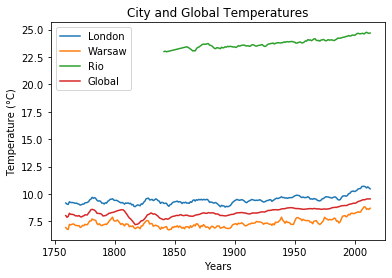

In [36]:
# Calculating the moving average for the new data and including London, Warsaw and Rio

def warsaw_moving_avg (mA_range, df_warsaw_input):
    output = df_warsaw_input.rolling(window = 10, on = "year" ).mean().dropna()
    return output

def rio_moving_avg (mA_range, df_rio_input):
    output = df_rio_input.rolling(window = 10, on = "year" ).mean().dropna()
    return output

mA_value = 10

# Renaming the function of the Moving Average again
warsaw_chart_moving_avg = warsaw_moving_avg(mA_value, df_warsaw)
rio_chart_moving_avg = rio_moving_avg(mA_value, df_rio)
plt.plot(chart_moving_avg ['year'], chart_moving_avg ['london_avg_temp'], label = 'London')
plt.plot(warsaw_chart_moving_avg ['year'], warsaw_chart_moving_avg ['warsaw_avg_temp'], label = 'Warsaw')
plt.plot(rio_chart_moving_avg ['year'], rio_chart_moving_avg ['rio_avg_temp'], label = 'Rio')
plt.plot(chart_moving_avg ['year'], chart_moving_avg ['global_avg_temp'], label = 'Global')
plt.legend()
plt.xlabel ( "Years" )
plt.ylabel ( "Temperature (°C)" )
plt.title ( "City and Global Temperatures" )
plt.show ()

The two cities I have added show very similar upward trendlines to London and the globe. Rio shows a much hotter average temperature than the global average.

## References
.copy() function: https://www.programiz.com/python-programming/methods/list/copy \
Markdown Basics: https://markdown-guide.readthedocs.io/en/latest/basics.html \
Instant SQL Formatter: http://www.dpriver.com/pp/sqlformat.htm \
round() Function: https://www.programiz.com/python-programming/methods/built-in/round \
print Wiki: https://en.wikibooks.org/wiki/Python_Programming/Input_and_Output \
print Tutorial 1: https://www.kite.com/python/answers/how-to-print-the-degree-symbol-in-python \
print Tutorial 2: https://www.datacamp.com/community/tutorials/python-print-function \
Math in Python: https://www.digitalocean.com/community/tutorials/how-to-do-math-in-python-3-with-operators \
Celcius Symbol: https://stackoverflow.com/questions/8440117/how-do-i-print-a-celsius-symbol-with-matplotlib \
Print Degree Symbol: https://www.datacamp.com/community/tutorials/python-print-function \
Correletion Coefficient: https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/ \
Pearson Correlaction Coefficient: https://www.youtube.com/watch?v=B8LcYdblXBI&ab_channel=TheEngineeringWorld \
Data Analyst Cheat Sheet: https://www.thinkful.com/blog/data-analyst-cheat-sheet/ \
SQL Order By: https://www.w3schools.com/sql/sql_ref_order_by.asp